In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import chainer
from chainer import Variable
import pathlib
import cv2
from generator64_wgan import Generator
from utils import combine_images

In [4]:
gen = Generator()

In [21]:
path = pathlib.Path("result_4/result_4_0/gen_epoch_160.npz")

In [22]:
chainer.serializers.load_npz(path, gen)

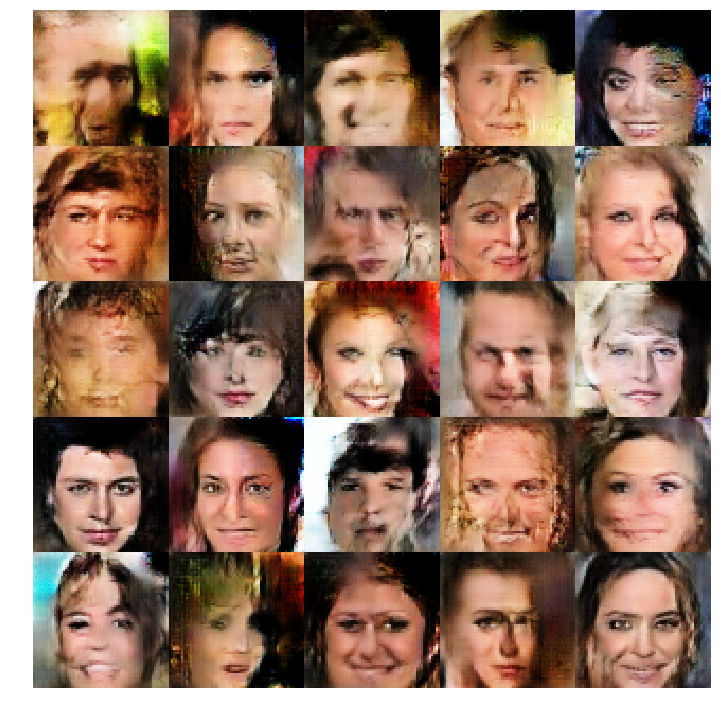

In [29]:
rows, cols = 5, 5
seed = 0
n_images = rows * cols

xp = gen.xp  # get module
xp.random.seed(seed)  # fix seed
np.random.seed(seed)  # fix seed
z = Variable(xp.asarray(gen.make_hidden(n_images)))
with chainer.using_config('train', False):
    with chainer.using_config('enable_backprop', False):
        x = gen(z)
x = chainer.backends.cuda.to_cpu(x.data)
np.random.seed()

x = (x * 127.5 + 127.5) / 255  # 0~255に戻し0~1へ変形
x = x.transpose(0, 2, 3, 1)  # NCHW->NHWCに変形
x = combine_images(x)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.imshow(x)
axes.axis("off")
#axes.set_title("epoch: {}".format(trainer.updater.epoch), fontsize=18)
fig.tight_layout()
fig.savefig("generate_data", bbox_inches="tight", pad_inches=0.0)